In [1]:
import sys
import importlib
import os

parent_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

import utils
importlib.reload(utils)
from utils import *

import files
importlib.reload(files)
from files import *

In [2]:
"""
Fusion des DataFrames de Text pour la  zone climatique : Toulouse 
"""
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)

In [3]:
"""
DataFrame de consommation de chauffage ((( approche de décomposition en parties de 6 heures))) à Toulouse et ses périphéries.
avec  les colonnes clusters de chaque parties 
"""
final_combined_df = pd.read_csv("../data/simulation_data/conso_kmeans_data/clusters_heat_perif_toulouse_parts_6h_combined_kmeans")


In [4]:
"""
Ajout d'une colonne binaire (pour identifier les jours de consommation) et des 4 colonnes 'cluster' pour chaque partie 
dans le DataFrame de température à l'extérieur de la zone climatique : Toulouse.
"""

Text_conso_heat_tou_parti=Text_combined_tou.copy()
Text_conso_heat_tou_parti['heat_on'] = final_combined_df['heat_on']
Text_conso_heat_tou_parti[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_tou_parti.columns = Text_conso_heat_tou_parti.columns.astype(str)

In [5]:
"""
Prédiction de consommation de chauffage (24 heures) ((((multi-label)))) des  clusters de chaque partie  en fonction de TEXT à Toulouse et ses périphéries :
- train/test split
- cross-validation
"""
X = Text_conso_heat_tou_parti.iloc[:, :-4].values  
y = Text_conso_heat_tou_parti.iloc[:, -4:].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = standardize_data(X_train)
X_test = standardize_data(X_test)

results_split=evaluate_models_split_multi_label(X_train, X_test, y_train, y_test, models2)
print("*"*100)
print("*"*100)
print("*"*100)
results_cv=evaluate_models_cv_multi_label(X, y, models2, cv=4)


Évaluation de Random Forest avec train_test_split...
Random Forest - Accuracy: 0.7831 - F1 Score: 0.9508 - 0/1 Loss: 0.2169 - Hamming Loss: 0.0475 - Temps d'exécution: 2.2928 sec
###################################################################

Évaluation de Logistic Regression avec train_test_split...
Logistic Regression - Accuracy: 0.7671 - F1 Score: 0.9477 - 0/1 Loss: 0.2329 - Hamming Loss: 0.0525 - Temps d'exécution: 0.0851 sec
###################################################################

Évaluation de SVC avec train_test_split...
SVC - Accuracy: 0.7648 - F1 Score: 0.9479 - 0/1 Loss: 0.2352 - Hamming Loss: 0.0530 - Temps d'exécution: 0.1487 sec
###################################################################

Évaluation de KNN avec train_test_split...
KNN - Accuracy: 0.7740 - F1 Score: 0.9439 - 0/1 Loss: 0.2260 - Hamming Loss: 0.0539 - Temps d'exécution: 0.3888 sec
###################################################################

Évaluation de Gradient Boosting ave

In [6]:
"""
Décomposition du DataFrame en deux parties : une pour Toulouse et une autre pour ses 3 villes périphériques, 
avec ajout d'une colonne binaire (jours de consommation) et des colonnes 'cluster' pour chaque partie.
"""
final_combined_df_toulouse=final_combined_df.iloc[-365:,:]
final_combined_df_toulouse = final_combined_df_toulouse.reset_index(drop=True)
Text_conso_heat_toulouse=Text_toulouse.copy()
Text_conso_heat_toulouse['heat_on'] = final_combined_df_toulouse['heat_on']
Text_conso_heat_toulouse[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df_toulouse[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_toulouse.columns = Text_conso_heat_toulouse.columns.astype(str)

final_combined_df_toulouse2=final_combined_df.iloc[:-365,:]
final_combined_df_toulouse2 = final_combined_df_toulouse2.reset_index(drop=True)
Text_conso_heat_tou_perif = pd.concat([Text_agen, Text_albi,Text_auch], axis=0).reset_index(drop=True)
Text_conso_heat_tou_perif['heat_on'] = final_combined_df_toulouse2['heat_on']
Text_conso_heat_tou_perif[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']] = final_combined_df_toulouse2[['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']]
Text_conso_heat_tou_perif.columns = Text_conso_heat_tou_perif.columns.astype(str)

In [7]:
"""
Prédiction de consommation de chauffage (24 heures) ((((multi-label)))) des  clusters de chaque partie  en fonction de TEXT à Toulouse et ses périphéries :
- train sur périphéries de toulouse et test sur toulouse
"""
X_train = Text_conso_heat_tou_perif.iloc[:, :-4].values  
y_train = Text_conso_heat_tou_perif.iloc[:, -4:].values  
X_test = Text_conso_heat_toulouse.iloc[:, :-4].values  
y_test = Text_conso_heat_toulouse.iloc[:, -4:].values 
X_train = standardize_data(X_train)
X_test = standardize_data(X_test)


results_split=evaluate_models_split_multi_label(X_train, X_test, y_train, y_test, models2)


Évaluation de Random Forest avec train_test_split...
Random Forest - Accuracy: 0.7890 - F1 Score: 0.9513 - 0/1 Loss: 0.2110 - Hamming Loss: 0.0466 - Temps d'exécution: 2.1148 sec
###################################################################

Évaluation de Logistic Regression avec train_test_split...
Logistic Regression - Accuracy: 0.7973 - F1 Score: 0.9548 - 0/1 Loss: 0.2027 - Hamming Loss: 0.0449 - Temps d'exécution: 0.0781 sec
###################################################################

Évaluation de SVC avec train_test_split...
SVC - Accuracy: 0.8000 - F1 Score: 0.9554 - 0/1 Loss: 0.2000 - Hamming Loss: 0.0444 - Temps d'exécution: 0.1250 sec
###################################################################

Évaluation de KNN avec train_test_split...
KNN - Accuracy: 0.8110 - F1 Score: 0.9529 - 0/1 Loss: 0.1890 - Hamming Loss: 0.0449 - Temps d'exécution: 0.1837 sec
###################################################################

Évaluation de Gradient Boosting ave

In [8]:
"""
Décomposer le DataFrame de température à l'extérieur de Toulouse et ses périphéries en parties de 6 heures,
avec le cluster de chaque partie pour faire la prédiction sur chaque partie seule.
ex:Text_partie_1
"""

target_cols = Text_conso_heat_tou_parti.columns[-4:]
col_commune = Text_conso_heat_tou_parti.columns[-5]
nb_cols = Text_conso_heat_tou_parti.shape[1] - 5  
for i, target_col in enumerate(target_cols):
    start = i * 6
    end = start + 6
    if end > nb_cols:
        break  
    block_cols = Text_conso_heat_tou_parti.columns[start:end]
    cols_to_keep = list(block_cols) + [col_commune, target_col]
    df_name = f"Text_partie_{i+1}"
    globals()[df_name] = Text_conso_heat_tou_parti[cols_to_keep].copy()


****************************************************************************************************
****************************************************************************************************
partie 1
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


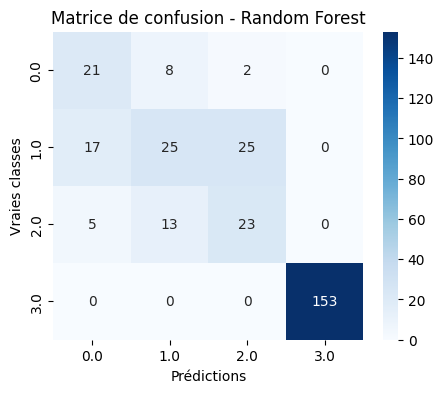

Random Forest - Accuracy: 0.7603 - F1 Score: 0.7567 - Temps d'exécution: 0.3146 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


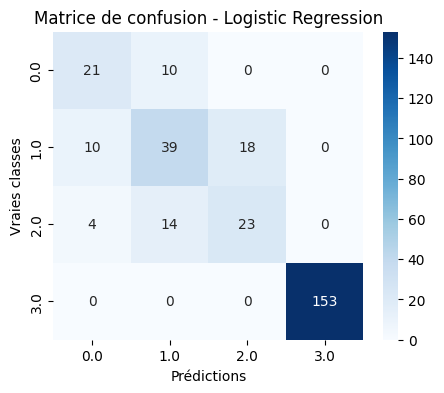

Logistic Regression - Accuracy: 0.8082 - F1 Score: 0.8080 - Temps d'exécution: 0.0937 sec
###################################################################

 Évaluation de SVC avec train_test_split...


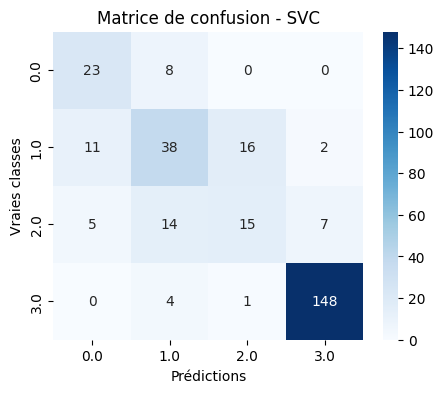

SVC - Accuracy: 0.7671 - F1 Score: 0.7609 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


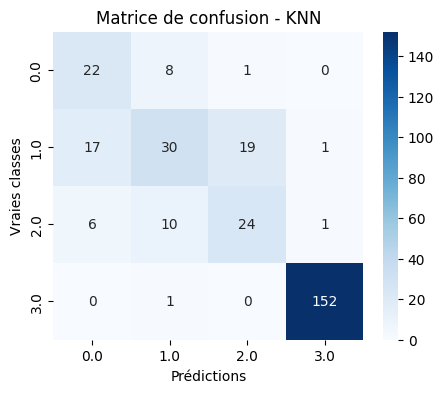

KNN - Accuracy: 0.7808 - F1 Score: 0.7783 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


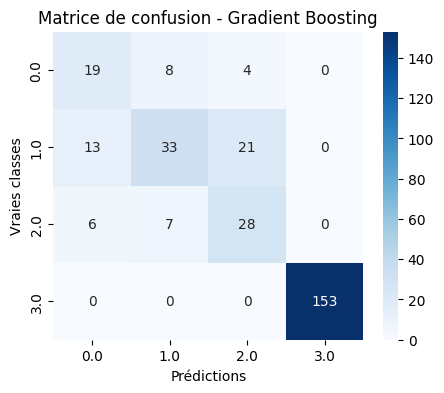

Gradient Boosting - Accuracy: 0.7979 - F1 Score: 0.7978 - Temps d'exécution: 1.4999 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 2
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


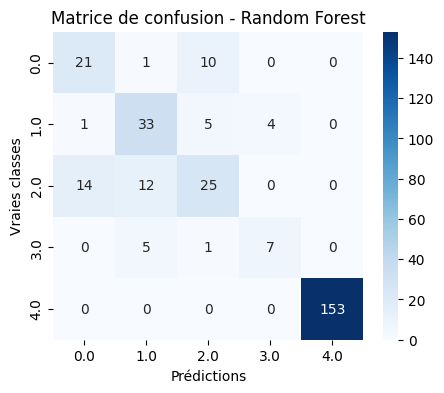

Random Forest - Accuracy: 0.8185 - F1 Score: 0.8159 - Temps d'exécution: 0.3033 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


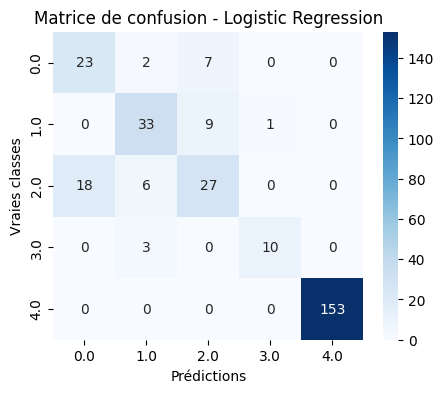

Logistic Regression - Accuracy: 0.8425 - F1 Score: 0.8422 - Temps d'exécution: 0.2491 sec
###################################################################

 Évaluation de SVC avec train_test_split...


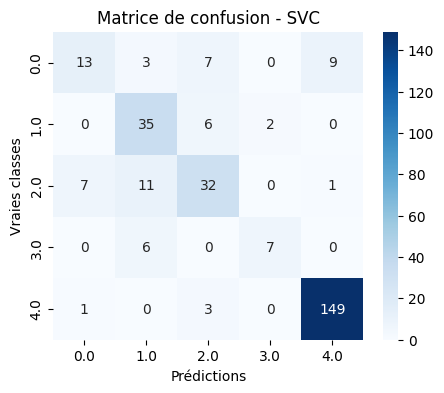

SVC - Accuracy: 0.8082 - F1 Score: 0.8006 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


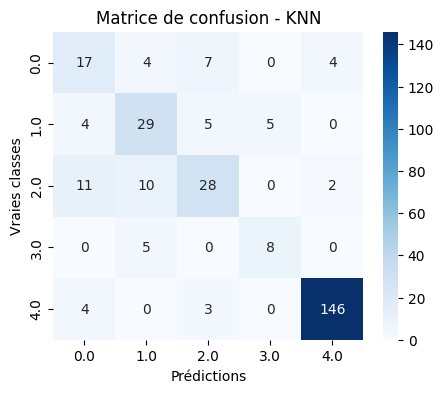

KNN - Accuracy: 0.7808 - F1 Score: 0.7817 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


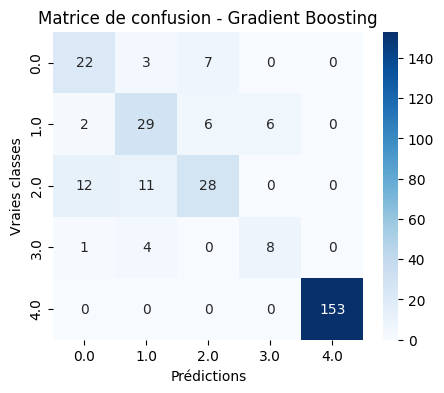

Gradient Boosting - Accuracy: 0.8219 - F1 Score: 0.8215 - Temps d'exécution: 1.8335 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 3
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


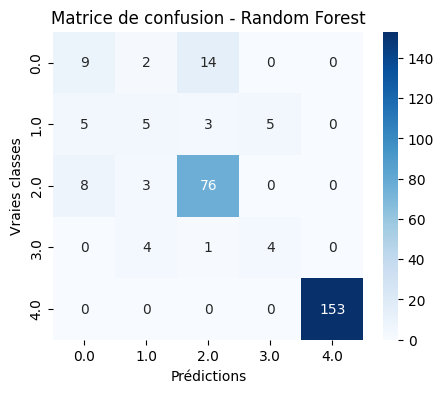

Random Forest - Accuracy: 0.8459 - F1 Score: 0.8399 - Temps d'exécution: 0.3124 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


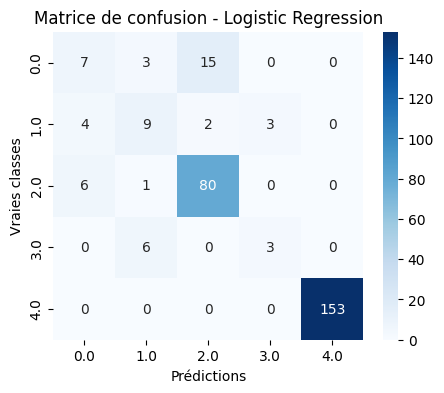

Logistic Regression - Accuracy: 0.8630 - F1 Score: 0.8539 - Temps d'exécution: 0.2846 sec
###################################################################

 Évaluation de SVC avec train_test_split...


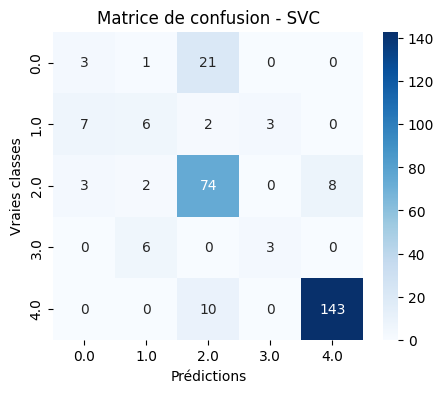

SVC - Accuracy: 0.7842 - F1 Score: 0.7685 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


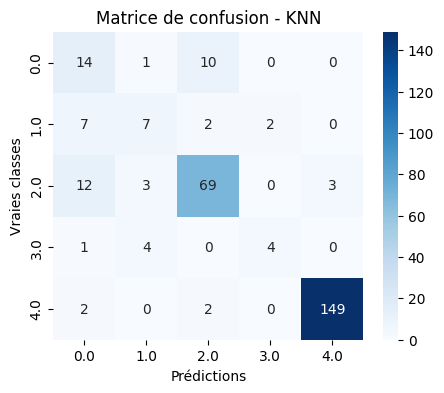

KNN - Accuracy: 0.8322 - F1 Score: 0.8357 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


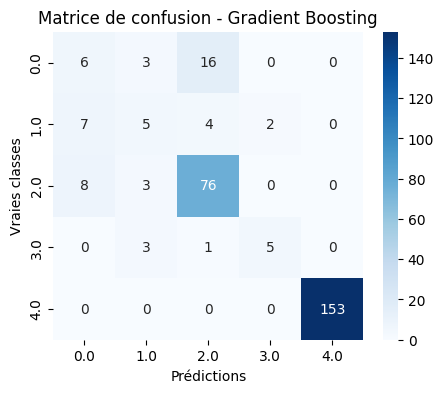

Gradient Boosting - Accuracy: 0.8390 - F1 Score: 0.8310 - Temps d'exécution: 1.8671 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 4
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


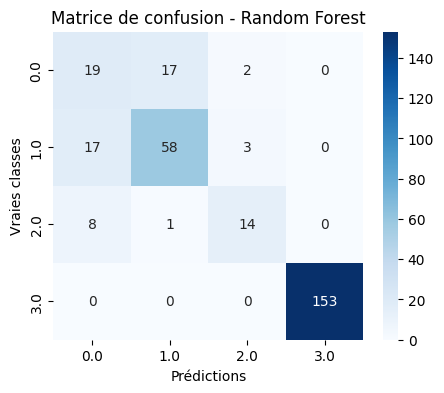

Random Forest - Accuracy: 0.8356 - F1 Score: 0.8380 - Temps d'exécution: 0.3059 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


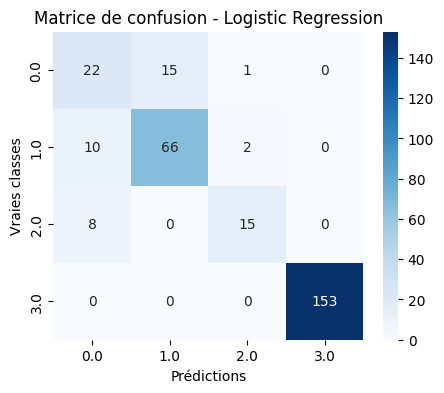

Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8768 - Temps d'exécution: 0.1562 sec
###################################################################

 Évaluation de SVC avec train_test_split...


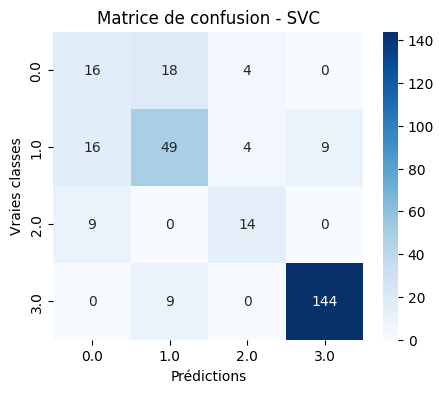

SVC - Accuracy: 0.7637 - F1 Score: 0.7649 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


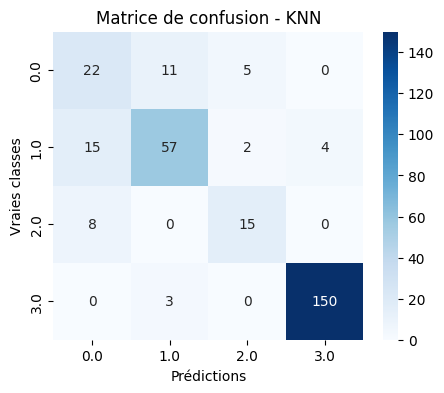

KNN - Accuracy: 0.8356 - F1 Score: 0.8379 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


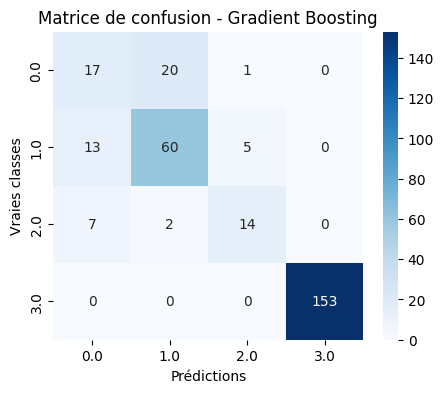

Gradient Boosting - Accuracy: 0.8356 - F1 Score: 0.8346 - Temps d'exécution: 1.4719 sec
###################################################################


In [9]:
"""
Prédiction de la consommation de chauffage en fonction de la température extérieure à Toulouse et ses périphéries, 
pour chaque partie de 6 heures séparément.
"""
for i in range(1, 5):
    print("*"*100)
    print("*"*100)
    print(f"partie {i}")
    print("*"*100)
    print("*"*100)
    Text_partie= globals()[f"Text_partie_{i}"]
    X = Text_partie.drop(columns=[f"cluster_{i}"])
    y = Text_partie[f"cluster_{i}"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_split = evaluate_models_split(X_train, X_test, y_train, y_test, models)

In [10]:
"""
Modification des 4 parties pour ajouter, à chaque segment de 6 heures, les 6 heures précédentes. 
pour effectuer des prédictions basées sur les 6 heures actuelles et les 6 heures passées
Chaque partie peut être accédée individuellement via `Text_parts_t_t_1['Text_part1_t_t-1']`, `Text_parts_t_t_1['Text_part2_t_t-1']`, etc.
"""

Text_parts_t_t_1 = {}
n_rows = Text_partie_1.shape[0]

for i in range(1, n_rows):
    Text_parts_row = {}
    old_parts = [Text_partie_1, Text_partie_2, Text_partie_3, Text_partie_4]
    prev_parts = [Text_partie_4, Text_partie_1, Text_partie_2, Text_partie_3]

    for j in range(4):
        df_current = old_parts[j]
        df_prev = prev_parts[j]

        current_hours = df_current.iloc[i, :-2]
        if j == 0:
            prev_hours = df_prev.iloc[i - 1, :-2]
        else:
            prev_hours = df_prev.iloc[i, :-2]

        combined_hours = pd.concat([prev_hours, current_hours], axis=0).reset_index(drop=True)
        heat_on = df_current.iloc[i, -2]
        cluster = df_current.iloc[i, -1]

        new_row = pd.concat([combined_hours, pd.Series([heat_on, cluster], index=['heat_on', 'cluster'])])
        Text_parts_row[f'Text_part{j + 1}_t_t-1'] = new_row

    for key in Text_parts_row:
        if key not in Text_parts_t_t_1:
            Text_parts_t_t_1[key] = []
        Text_parts_t_t_1[key].append(Text_parts_row[key])

for key in Text_parts_t_t_1:
    Text_parts_t_t_1[key] = pd.DataFrame(Text_parts_t_t_1[key]).reset_index(drop=True)

print(Text_parts_t_t_1['Text_part1_t_t-1'])


          0      1      2      3      4      5      6     7     8     9    10  \
0     12.60  12.25  11.95  11.60  11.25  10.90  10.45  9.80  9.15  8.75  8.45   
1      8.75   8.45   8.20   7.95   7.65   7.15   7.05  7.30  7.30  7.30  7.35   
2     11.10  10.70  10.30   9.80   9.35   8.75   8.30  8.00  7.35  6.85  6.55   
3      8.45   7.75   7.10   6.45   5.80   5.15   4.55  4.00  3.45  3.05  2.75   
4      8.65   8.10   7.55   7.05   6.50   5.95   5.45  4.95  4.45  4.05  3.80   
...     ...    ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   
1454  -0.30  -0.85  -1.35  -1.90  -2.45  -3.00  -3.25 -3.25 -3.30 -3.35 -3.45   
1455  -0.30  -0.55  -0.80  -1.00  -1.20  -1.45  -1.55 -1.40 -1.25 -1.15 -1.05   
1456   4.60   4.45   4.30   4.15   4.00   3.85   3.60  3.15  2.70  2.40  2.15   
1457   6.35   6.30   6.30   6.25   6.20   6.20   6.25  6.40  6.55  6.65  6.80   
1458   9.45   9.20   9.20   8.95   8.60   8.30   7.80  6.95  6.00  5.25  4.70   

        11  heat_on  cluste

****************************************************************************************************
****************************************************************************************************
partie 1
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


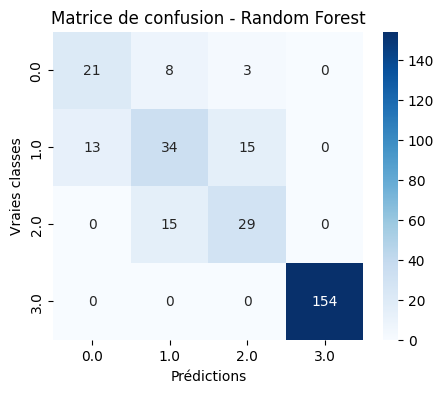

Random Forest - Accuracy: 0.8151 - F1 Score: 0.8145 - Temps d'exécution: 0.3745 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


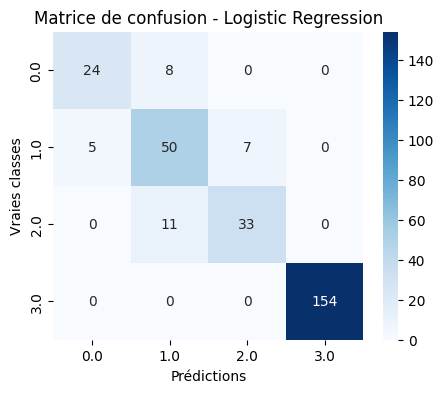

Logistic Regression - Accuracy: 0.8938 - F1 Score: 0.8941 - Temps d'exécution: 0.2123 sec
###################################################################

 Évaluation de SVC avec train_test_split...


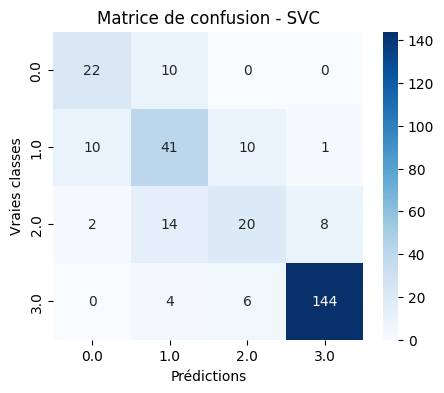

SVC - Accuracy: 0.7774 - F1 Score: 0.7761 - Temps d'exécution: 0.0625 sec
###################################################################

 Évaluation de KNN avec train_test_split...


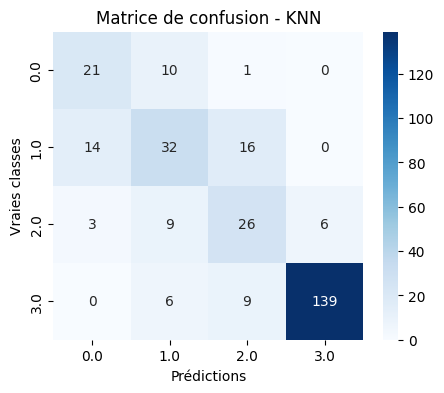

KNN - Accuracy: 0.7466 - F1 Score: 0.7519 - Temps d'exécution: 0.0351 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


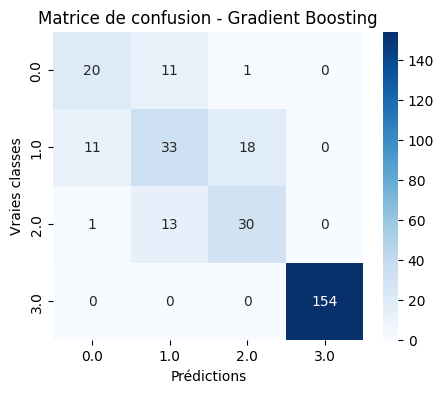

Gradient Boosting - Accuracy: 0.8116 - F1 Score: 0.8109 - Temps d'exécution: 2.3081 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 2
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


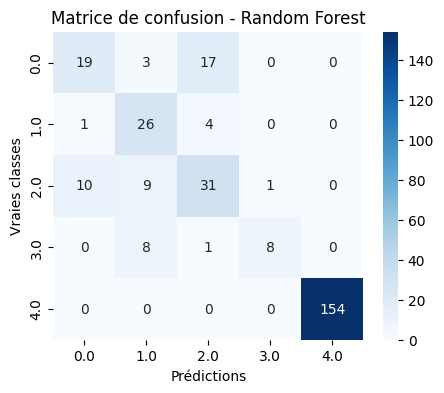

Random Forest - Accuracy: 0.8151 - F1 Score: 0.8126 - Temps d'exécution: 0.3905 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


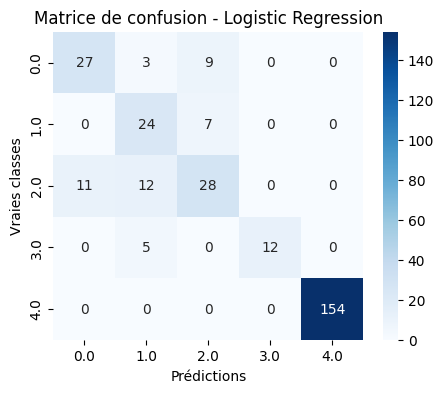

Logistic Regression - Accuracy: 0.8390 - F1 Score: 0.8401 - Temps d'exécution: 0.3471 sec
###################################################################

 Évaluation de SVC avec train_test_split...


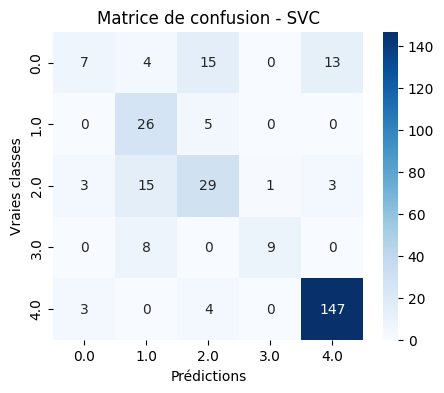

SVC - Accuracy: 0.7466 - F1 Score: 0.7270 - Temps d'exécution: 0.0500 sec
###################################################################

 Évaluation de KNN avec train_test_split...


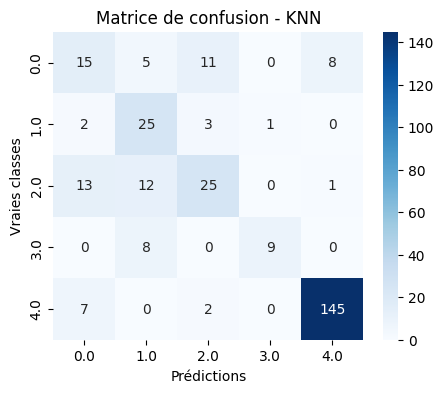

KNN - Accuracy: 0.7500 - F1 Score: 0.7486 - Temps d'exécution: 0.0319 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


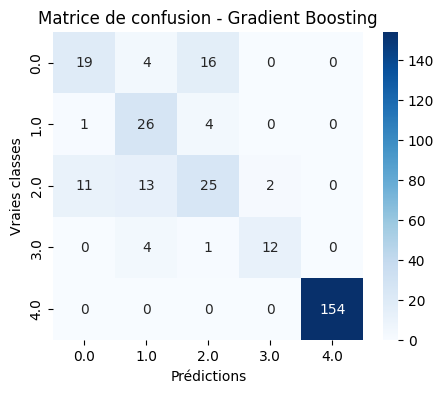

Gradient Boosting - Accuracy: 0.8082 - F1 Score: 0.8058 - Temps d'exécution: 2.8712 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 3
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


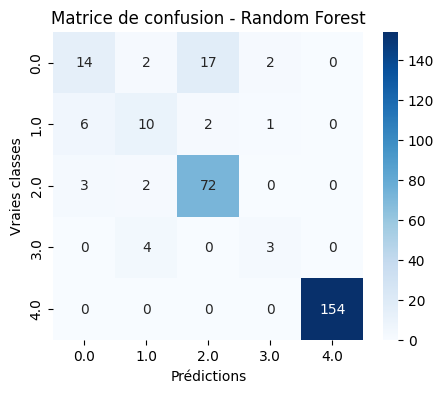

Random Forest - Accuracy: 0.8664 - F1 Score: 0.8575 - Temps d'exécution: 0.3902 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


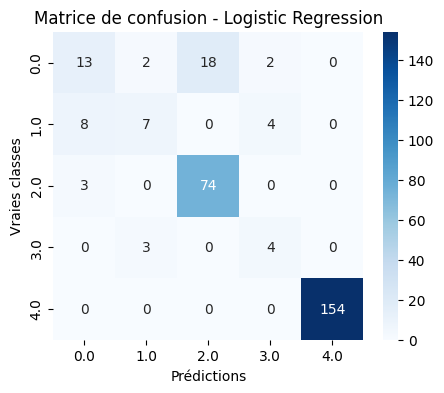

Logistic Regression - Accuracy: 0.8630 - F1 Score: 0.8518 - Temps d'exécution: 0.4403 sec
###################################################################

 Évaluation de SVC avec train_test_split...


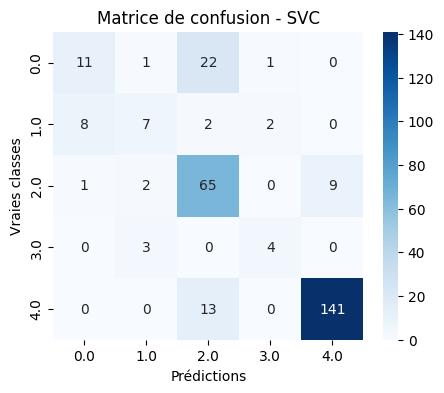

SVC - Accuracy: 0.7808 - F1 Score: 0.7709 - Temps d'exécution: 0.0442 sec
###################################################################

 Évaluation de KNN avec train_test_split...


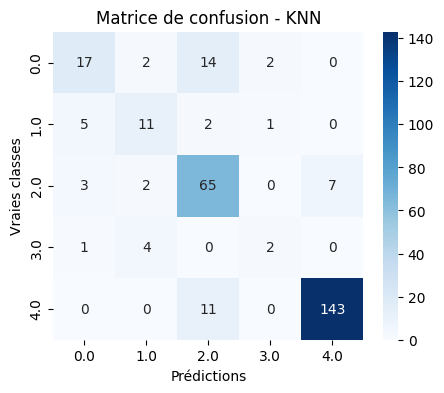

KNN - Accuracy: 0.8151 - F1 Score: 0.8115 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


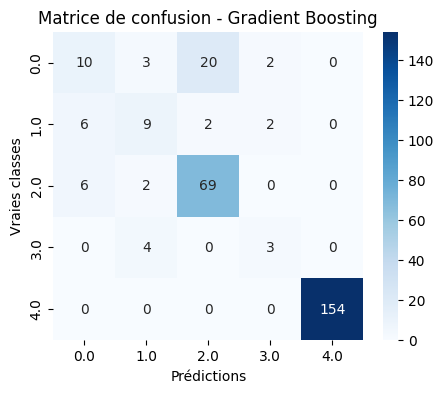

Gradient Boosting - Accuracy: 0.8390 - F1 Score: 0.8280 - Temps d'exécution: 3.0096 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
partie 4
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec train_test_split...


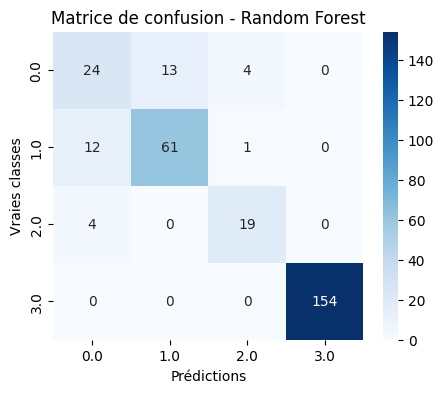

Random Forest - Accuracy: 0.8836 - F1 Score: 0.8832 - Temps d'exécution: 0.3437 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


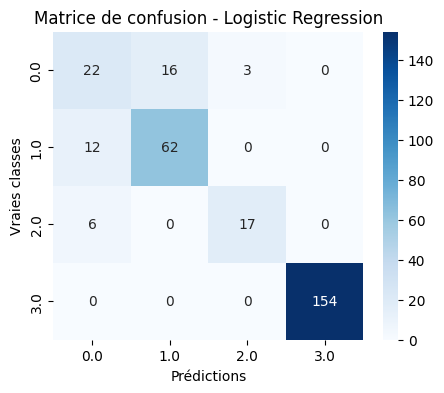

Logistic Regression - Accuracy: 0.8733 - F1 Score: 0.8727 - Temps d'exécution: 0.3500 sec
###################################################################

 Évaluation de SVC avec train_test_split...


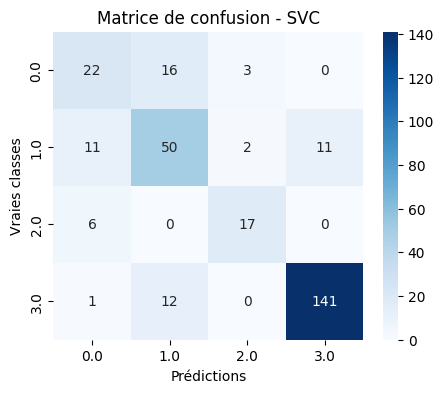

SVC - Accuracy: 0.7877 - F1 Score: 0.7885 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


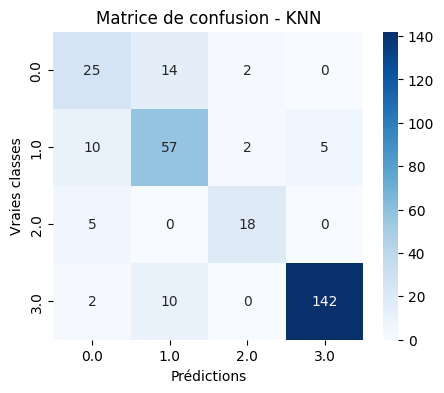

KNN - Accuracy: 0.8288 - F1 Score: 0.8316 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


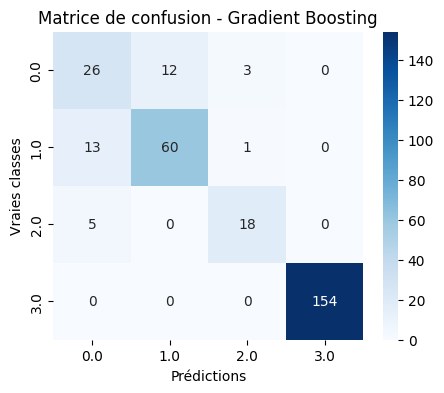

Gradient Boosting - Accuracy: 0.8836 - F1 Score: 0.8846 - Temps d'exécution: 2.4126 sec
###################################################################


In [11]:
"""
Prédiction de la consommation de chauffage en fonction de la température extérieure à Toulouse et ses périphéries, 
pour chaque partie de 6 heures de T + 6 heures de T-1 séparément.
"""

for i in range(1, 5):
    print("*"*100)
    print("*"*100)
    print(f"partie {i}")
    print("*"*100)
    print("*"*100) 
    Text_partie_t_t_1= Text_parts_t_t_1[f"Text_part{i}_t_t-1"]
    Text_partie_t_t_1.columns = Text_partie_t_t_1.columns.astype(str)
    X = Text_partie_t_t_1.drop(columns=["cluster"])
    y = Text_partie_t_t_1["cluster"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_split = evaluate_models_split(X_train, X_test, y_train, y_test, models)